In [1]:
import numpy as np

import sys
sys.path.insert(1, 'C:/Users/microspheres/Documents/Nanosphere github/nanospheres')
import Control.src.RIGOL_control.DG822.DG822_control as rig

import pyvisa
import importlib

In [2]:
importlib.reload(rig)

<module 'Control.src.RIGOL_control.DG822.DG822_control' from 'C:\\Users/microspheres/Documents/Nanosphere github/nanospheres\\Control\\src\\RIGOL_control\\DG822\\DG822_control.py'>

In [3]:
rm = pyvisa.ResourceManager()
r = rm.list_resources()
print(r)

('USB0::0x1AB1::0x0643::DG8A261500548::INSTR',)


In [4]:
_VISA_ADDRESS_rigol = 'USB0::0x1AB1::0x0643::DG8A261500548::INSTR'

DG822 = rig.FuncGen(_VISA_ADDRESS_rigol)

Connected to Rigol Technologies model DG812, serial DG8A261500548


In [19]:
waveform = np.array([10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0])
DG822.write_binary("DATA:DATA EMEMory,", waveform)

In [23]:
DG822.write(':MMEM:DOWN:FNAM "C:\Arb File"')

In [22]:
DG822.query(':MMEMory:CATalog:STATe?')

'28672,143044608\n'

In [128]:
DG822.query(':MMEM:CDIR?')

'C:\n'

In [5]:
DG822.write(':MMEM:STOR "test3.SEQ"')

In [142]:
DG822.write(':MMEM:LOAD "vbhgd.SEQ"')

In [24]:
import numpy as np
import scipy.signal as scisig
import matplotlib.pyplot as plt

In [110]:
2**14

16384

In [120]:
sigmax = 100
freqs = np.array([52000, 53000, 54000, 55000, 44000, 43000, 42000, 41000])
time = np.linspace(0, 0.001, 16384)
sig_f = np.zeros(len(time))
for i in range(10000):
    sig = np.zeros(len(time))
    for f in freqs:
        sig += np.sin(2*np.pi*f*time+np.random.uniform(0, 2*np.pi))
    if np.max(sig) < sigmax:
        sigmax = np.max(sig)
        sig_f = sig

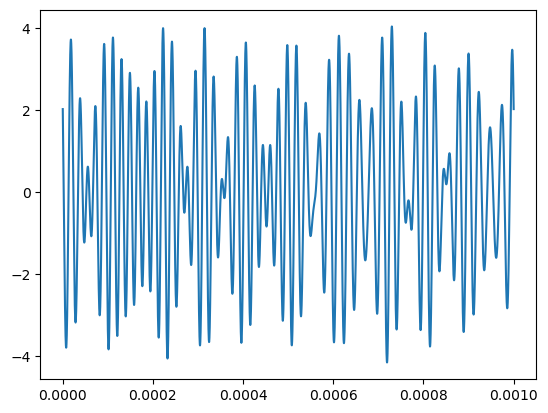

In [121]:
plt.plot(time, sig_f)

In [115]:
PSD = scisig.welch(sig_f, fs = 1/time[1], nperseg = int(16384))

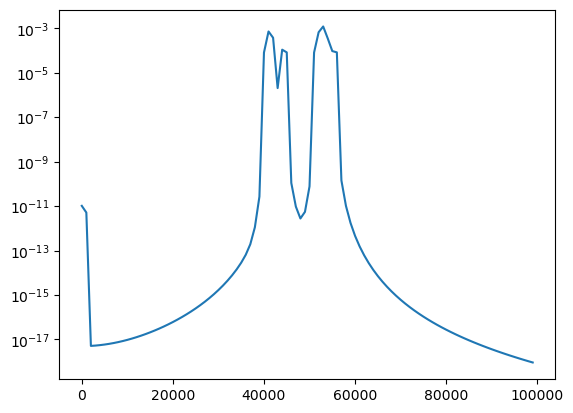

In [117]:
lb = 0
ub = 100
plt.plot(PSD[0][lb:ub], PSD[1][lb:ub])
plt.yscale('log')

In [97]:
import csv

In [119]:
filename = 'C:/Users/microspheres/Documents/Nanosphere github/nanospheres/Nanosphere_side_table/test.csv'

header = [['RIGOL:CSV DATA FILE'],
['TYPE:Arb'],
['AMP:2Vpp'],
['DATA Number:16384'],
['MODE:Insert'],
['Sample Rate:16384000'],
['FileHead Length:15']]

spaces = [[''], [''], [''], [''], [''], [''], [''], ['']]

data = [[i] for i in sig_f/8]


with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(header)
    writer.writerows(spaces)
    writer.writerows(data)

In [104]:
[[i] for i in sig_f]

[[1.511769550038427],
 [1.5245062470564945],
 [1.5372155081141057],
 [1.5498970370037188],
 [1.5625505379951585],
 [1.5751757158429185],
 [1.5877722757934523],
 [1.6003399235924607],
 [1.6128783654921746],
 [1.6253873082586154],
 [1.6378664591788703],
 [1.6503155260683318],
 [1.6627342172779525],
 [1.6751222417014762],
 [1.687479308782668],
 [1.699805128522525],
 [1.7120994114864927],
 [1.7243618688116582],
 [1.7365922122139401],
 [1.748790153995267],
 [1.760955407050747],
 [1.773087684875821],
 [1.7851867015734175],
 [1.7972521718610848],
 [1.8092838110781133],
 [1.821281335192659],
 [1.8332444608088392],
 [1.845172905173826],
 [1.857066386184928],
 [1.8689246223966598],
 [1.8807473330277924],
 [1.8925342379684031],
 [1.9042850577869048],
 [1.915999513737063],
 [1.927677327765005],
 [1.9393182225162136],
 [1.950921921342502],
 [1.9624881483089889],
 [1.9740166282010398],
 [1.985507086531221],
 [1.9969592495462125],
 [2.008372844233726],
 [2.0197475983294026],
 [2.031083240323693],
 [2